# Práctica 1

### Regresión lineal

##### Eladia Gómez Morales y Ana Martínez Sabiote

In [91]:
import time
import numpy as np
from pandas.io.parsers import read_csv
import matplotlib.pyplot as plt
import matplotlib as cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [92]:
def carga_csv(file_name):
    valores = read_csv(file_name, header=None).to_numpy()
    return valores.astype(float)

### Ejercicio regresión 1 

In [93]:
def plot_H(theta0, theta1):
    min_x = min(X)
    max_x = max(X)
    min_y = theta0 + theta1 * min_x
    max_y = theta0 + theta1 * max_x
    plt.plot([min_x, max_x], [min_y, max_y])
    plt.savefig("resultado.pdf")

In [94]:
def f_coste(theta_0, theta_1, m):
    sum=0.0
    for i in range(m):
        sum = sum + (((theta_0 + theta_1 * X[i]) - Y[i])**2)
    return (sum/(2.0*m))

In [95]:
def gradientDescent(X, Y, alpha):
    theta_0 = theta_1 = 0
    for _ in range(1500):
        sum_0 = sum_1 = 0
        coste = f_coste(theta_0, theta_1, m)
        #print('Función de coste {} = {}'.format(_, coste))
        for i in range(m):
            sum_0 += (theta_0 + theta_1 * X[i]) - Y[i]
            sum_1 += ((theta_0 + theta_1 * X[i]) - Y[i]) * X[i]
        theta_0 = theta_0 - (alpha / m) * sum_0
        theta_1 = theta_1 - (alpha / m) * sum_1
        plt.plot(X, Y, "x")
        
    return theta_0, theta_1

In [96]:
def coste_vec(X, Y, Theta):
    X = datos[:, :-1]
    np.shape(X)         # (97, 1)
    Y = datos[:, -1]
    np.shape(Y)         # (97,)
    m = np.shape(X)[0]
    n = np.shape(X)[1]
    # añadimos una columna de 1's a la X
    X = np.hstack([np.ones([m, 1]), X])
    H = np.dot(X, Theta)
    Aux = (H - Y) ** 2
    return Aux.sum() / (2 * len(X))

In [97]:
def make_data(t0_range, t1_range, X, Y):
    step=0.1
    Theta0 = np.arange(t0_range[0], t0_range[1], step)
    Theta1 = np.arange(t1_range[0], t1_range[1], step)
    Theta0, Theta1 = np.meshgrid(Theta0, Theta1)
    Coste = np.empty_like(Theta0)
    for ix, iy in np.ndindex(Theta0.shape):
        Coste[ix, iy] = coste_vec(X, Y, [Theta0[ix, iy], Theta1[ix, iy]])
    return [Theta0, Theta1, Coste]

Theta0 = -3.63029143940436, Theta1 = 1.166362350335582
Función h(x)=-3.63029143940436+1.166362350335582x
Función de coste 4.483388256587726


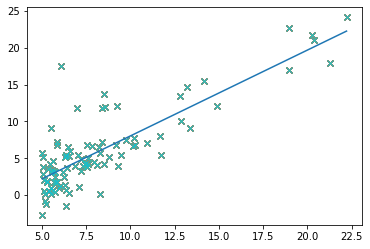

In [98]:
datos = carga_csv('ex1data1.csv')
X=datos[:,0]
Y=datos[:,1]
m=len(X)
alpha=0.01
theta0,theta1 = gradientDescent(X, Y, alpha)
plot_H(theta0, theta1)
print('Theta0 = {}, Theta1 = {}'.format(theta0, theta1))
print('Función h(x)={}+{}x'.format(theta0,theta1))
coste = f_coste(theta0, theta1, m)
print('Función de coste {}'.format(coste))


C:\Users\anama\AppData\Local\Temp/ipykernel_15604/160143586.py:9: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection = '3d')


AttributeError: module 'matplotlib' has no attribute 'coolwarm'

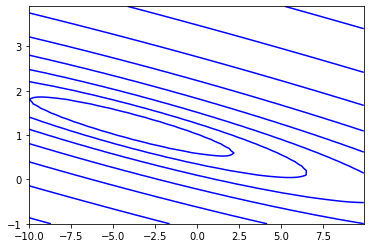

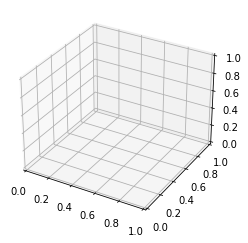

In [99]:
t0, t1, costes = make_data([-10, 10], [-1, 4], X, Y)

plt.figure()
plt.contour(t0, t1, costes, np.logspace(-2,3,20), colors ='blue')
plt.savefig('Graf2d')


fig = plt.figure()
ax = fig.gca(projection = '3d')
surf = ax.plot_surface(t0, t1, costes, cmap=cm.coolwarm, linewidth=0, antialiased=False)
plt.xlabel("Valor t0")
plt.ylabel("Valor t1")
plt.savefig('Graf3d')
fig.colorbar(surf, shrink=0.5, aspect=5)

